### Packages that we need to proceed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [2]:
import pandas as pd
Data = pd.read_csv("train.csv")
Data.shape

(3960, 82)

In [3]:
Test = pd.read_csv("test.csv")
Test.shape

(20, 59)

### First will seperate the target variable and will identity the number of classes in dataset

In [4]:
Data["sii"].isnull().sum()

1224

In [5]:
Data.dropna(subset=['sii'], inplace=True)
Data.shape

(2736, 82)

In [6]:
print(f"Total number of classes: {len(Data['sii'].unique())} and these classes are labelled as: {Data['sii'].unique()}")

Total number of classes: 4 and these classes are labelled as: [2. 0. 1. 3.]


In [7]:
targetVariable = Data['sii']

#### Based on the columns in test_set we will first keep those columns in dataset

In [8]:
for col in Data.columns:
    if col not in Test.columns:
        Data.drop(columns=[col], inplace=True)

print(f"Columns is DataTrain_set: {len(Data.columns)}")
print(f"Columns is Test_set: {len(Test.columns)}")

Columns is DataTrain_set: 59
Columns is Test_set: 59


In [9]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Basic_Demos-Age,2736.0,10.238670,3.427982,5.000000,8.000000,10.00000,12.000000,22.000000
Basic_Demos-Sex,2736.0,0.364401,0.481350,0.000000,0.000000,0.00000,1.000000,1.000000
CGAS-CGAS_Score,2342.0,65.159266,11.811050,25.000000,59.000000,65.00000,75.000000,95.000000
Physical-BMI,2527.0,19.125667,4.909305,0.000000,15.773447,17.81901,21.172311,46.102914
Physical-Height,2530.0,55.897051,7.394938,36.000000,50.050000,55.00000,61.750000,78.500000
Physical-Weight,2572.0,87.839592,43.353079,0.000000,57.200000,75.80000,111.450000,315.000000
Physical-Waist_Circumference,483.0,26.625259,5.230213,19.000000,23.000000,26.00000,29.000000,50.000000
Physical-Diastolic_BP,2478.0,69.755044,13.790203,11.000000,61.000000,68.00000,76.000000,179.000000
Physical-HeartRate,2486.0,81.823411,13.769816,27.000000,73.000000,81.00000,91.000000,138.000000
Physical-Systolic_BP,2478.0,117.127926,17.221707,49.000000,107.000000,114.00000,125.000000,203.000000


In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2595 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    float64
 

### Below showns the distribution of target class

In [11]:
targetVariable.value_counts()
## So it clearly showns the class inbalance problem with dataset

sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64

In [12]:
Data.drop(columns=['id'], inplace=True)

In [13]:
data_types_dict = Data.dtypes.to_dict()
unique_data_types_count = pd.Series(data_types_dict).value_counts()
unique_data_types_count

float64    46
object     10
int64       2
Name: count, dtype: int64

In [14]:
object_columns_list = [col for col, dtype in data_types_dict.items() if dtype == 'O']
object_columns_list

['Basic_Demos-Enroll_Season',
 'CGAS-Season',
 'Physical-Season',
 'Fitness_Endurance-Season',
 'FGC-Season',
 'BIA-Season',
 'PAQ_A-Season',
 'PAQ_C-Season',
 'SDS-Season',
 'PreInt_EduHx-Season']

In [15]:
for categoricalCol in object_columns_list:
    print(f"Number of null values for the column named-{categoricalCol} {Data[categoricalCol].isnull().sum()}")

Number of null values for the column named-Basic_Demos-Enroll_Season 0
Number of null values for the column named-CGAS-Season 394
Number of null values for the column named-Physical-Season 141
Number of null values for the column named-Fitness_Endurance-Season 1476
Number of null values for the column named-FGC-Season 89
Number of null values for the column named-BIA-Season 892
Number of null values for the column named-PAQ_A-Season 2373
Number of null values for the column named-PAQ_C-Season 1296
Number of null values for the column named-SDS-Season 209
Number of null values for the column named-PreInt_EduHx-Season 17


In [16]:
for col in Data.columns:
    print(Data[col].head(1))

0    Fall
Name: Basic_Demos-Enroll_Season, dtype: object
0    5
Name: Basic_Demos-Age, dtype: int64
0    0
Name: Basic_Demos-Sex, dtype: int64
0    Winter
Name: CGAS-Season, dtype: object
0    51.0
Name: CGAS-CGAS_Score, dtype: float64
0    Fall
Name: Physical-Season, dtype: object
0    16.877316
Name: Physical-BMI, dtype: float64
0    46.0
Name: Physical-Height, dtype: float64
0    50.8
Name: Physical-Weight, dtype: float64
0   NaN
Name: Physical-Waist_Circumference, dtype: float64
0   NaN
Name: Physical-Diastolic_BP, dtype: float64
0   NaN
Name: Physical-HeartRate, dtype: float64
0   NaN
Name: Physical-Systolic_BP, dtype: float64
0    NaN
Name: Fitness_Endurance-Season, dtype: object
0   NaN
Name: Fitness_Endurance-Max_Stage, dtype: float64
0   NaN
Name: Fitness_Endurance-Time_Mins, dtype: float64
0   NaN
Name: Fitness_Endurance-Time_Sec, dtype: float64
0    Fall
Name: FGC-Season, dtype: object
0    0.0
Name: FGC-FGC_CU, dtype: float64
0    0.0
Name: FGC-FGC_CU_Zone, dtype: float64
0

In [17]:
print(f"Columns with the categorical information of Seasons (Summer, Winter, Autumn, Spring):")
object_columns_list


Columns with the categorical information of Seasons (Summer, Winter, Autumn, Spring):


['Basic_Demos-Enroll_Season',
 'CGAS-Season',
 'Physical-Season',
 'Fitness_Endurance-Season',
 'FGC-Season',
 'BIA-Season',
 'PAQ_A-Season',
 'PAQ_C-Season',
 'SDS-Season',
 'PreInt_EduHx-Season']

#### For Basic_Demos-Enroll_Season missing values filling

In [18]:
print(f"Number of null values for the column named-> Basic_Demos-Enroll_Season: {Data['Basic_Demos-Enroll_Season'].isnull().sum()}")
Data['Basic_Demos-Enroll_Season'].value_counts()

Number of null values for the column named-> Basic_Demos-Enroll_Season: 0


Basic_Demos-Enroll_Season
Spring    734
Fall      676
Winter    676
Summer    650
Name: count, dtype: int64

#### For CGAS-Season missing values filling

In [19]:
print(f"Number of null values for the column named-> CGAS-Season: {Data['CGAS-Season'].isnull().sum()}")
Data['CGAS-Season'].value_counts()

Number of null values for the column named-> CGAS-Season: 394


CGAS-Season
Spring    665
Fall      583
Summer    559
Winter    535
Name: count, dtype: int64

In [20]:
# Calculate category probabilities
category_probs = Data[object_columns_list[1]].value_counts(normalize=True)

# Find indices of missing values
missing_indices = Data[Data['CGAS-Season'].isnull()].index

# Assign random values based on probabilities
Data.loc[missing_indices, 'CGAS-Season'] = np.random.choice(
    category_probs.index, size=len(missing_indices), p=category_probs.values
)

# Check remaining missing values
missing_after = Data['CGAS-Season'].isnull().sum()
print(f"Missing values after filling: {missing_after}")
print(f"Number of null values for the column named-> CGAS-Season: {missing_after}")

# Display updated value counts
print("Updated CGAS-Season Value Counts:")
print(Data['CGAS-Season'].value_counts())


Missing values after filling: 0
Number of null values for the column named-> CGAS-Season: 0
Updated CGAS-Season Value Counts:
CGAS-Season
Spring    779
Fall      692
Summer    638
Winter    627
Name: count, dtype: int64


#### For Physical-Season missing values filling

In [22]:
print(f"Number of null values for the column named-> Physical-Season: {Data['Physical-Season'].isnull().sum()}")
Data['Physical-Season'].value_counts()

Number of null values for the column named-> Physical-Season: 141


Physical-Season
Spring    709
Fall      650
Winter    634
Summer    602
Name: count, dtype: int64

In [23]:
# Calculate category probabilities
category_probs = Data['Physical-Season'].value_counts(normalize=True)

# Find indices of missing values
missing_indices = Data[Data['Physical-Season'].isnull()].index

# Assign random values based on probabilities
Data.loc[missing_indices, 'Physical-Season'] = np.random.choice(
    category_probs.index, size=len(missing_indices), p=category_probs.values
)

# Check remaining missing values
missing_after = Data['Physical-Season'].isnull().sum()
print(f"Missing values after filling Physical-Season: {missing_after}")

# Display updated value counts
print("Updated Physical-Season Value Counts:")
print(Data['Physical-Season'].value_counts())


Missing values after filling Physical-Season: 0
Updated Physical-Season Value Counts:
Physical-Season
Spring    755
Fall      682
Winter    671
Summer    628
Name: count, dtype: int64


#### For Fitness_Endurance-Season missing values filling

In [24]:
print(f"Number of null values for the column named-> Fitness_Endurance-Season: {Data['Fitness_Endurance-Season'].isnull().sum()}")
Data['Fitness_Endurance-Season'].value_counts()

Number of null values for the column named-> Fitness_Endurance-Season: 1476


Fitness_Endurance-Season
Spring    377
Winter    331
Fall      316
Summer    236
Name: count, dtype: int64

In [25]:
Data.drop(columns=['Fitness_Endurance-Season'], inplace=True)

#### For FGC-Season missing values filling 

In [26]:
print(f"Number of null values for the column named-> FGC-Season: {Data['FGC-Season'].isnull().sum()}")
Data['FGC-Season'].value_counts()

Number of null values for the column named-> FGC-Season: 89


FGC-Season
Spring    771
Summer    659
Fall      633
Winter    584
Name: count, dtype: int64

In [27]:
# Calculate category probabilities
category_probs = Data['FGC-Season'].value_counts(normalize=True)

# Find indices of missing values
missing_indices = Data[Data['FGC-Season'].isnull()].index

# Assign random values based on probabilities
Data.loc[missing_indices, 'FGC-Season'] = np.random.choice(
    category_probs.index, size=len(missing_indices), p=category_probs.values
)

# Check remaining missing values
missing_after = Data['FGC-Season'].isnull().sum()
print(f"Missing values after filling FGC-Season: {missing_after}")

# Display updated value counts
print("Updated FGC-Season Value Counts:")
print(Data['FGC-Season'].value_counts())


Missing values after filling FGC-Season: 0
Updated FGC-Season Value Counts:
FGC-Season
Spring    791
Summer    693
Fall      652
Winter    600
Name: count, dtype: int64


#### For PAQ_A-Season missing values filling

In [28]:
print(f"Number of null values for the column named-> PAQ_A-Season: {Data['PAQ_A-Season'].isnull().sum()}")
Data['PAQ_A-Season'].value_counts()

Number of null values for the column named-> PAQ_A-Season: 2373


PAQ_A-Season
Winter    98
Summer    97
Spring    90
Fall      78
Name: count, dtype: int64

In [29]:
Data.drop(columns=["PAQ_A-Season"], inplace=True)

#### For PAQ_C-Season missing values filling

In [30]:
print(f"Number of null values for the column named-> PAQ_C-Season: {Data['PAQ_C-Season'].isnull().sum()}")
Data['PAQ_C-Season'].value_counts()

Number of null values for the column named-> PAQ_C-Season: 1296


PAQ_C-Season
Spring    405
Winter    385
Summer    342
Fall      308
Name: count, dtype: int64

In [31]:
# Calculate category probabilities
category_probs = Data['PAQ_C-Season'].value_counts(normalize=True)

# Find indices of missing values
missing_indices = Data[Data['PAQ_C-Season'].isnull()].index

# Assign random values based on probabilities
Data.loc[missing_indices, 'PAQ_C-Season'] = np.random.choice(
    category_probs.index, size=len(missing_indices), p=category_probs.values
)

# Check remaining missing values
missing_after = Data['PAQ_C-Season'].isnull().sum()
print(f"Missing values after filling PAQ_C-Season: {missing_after}")

# Display updated value counts
print("Updated PAQ_C-Season Value Counts:")
print(Data['PAQ_C-Season'].value_counts())


Missing values after filling PAQ_C-Season: 0
Updated PAQ_C-Season Value Counts:
PAQ_C-Season
Spring    770
Winter    716
Summer    654
Fall      596
Name: count, dtype: int64


#### For SDS-Season missing values filling

In [32]:
print(f"Number of null values for the column named-> SDS-Season: {Data['SDS-Season'].isnull().sum()}")
Data['SDS-Season'].value_counts()

Number of null values for the column named-> SDS-Season: 209


SDS-Season
Spring    692
Winter    629
Fall      605
Summer    601
Name: count, dtype: int64

In [33]:
# Calculate category probabilities
category_probs = Data['SDS-Season'].value_counts(normalize=True)

# Find indices of missing values
missing_indices = Data[Data['SDS-Season'].isnull()].index

# Assign random values based on probabilities
Data.loc[missing_indices, 'SDS-Season'] = np.random.choice(
    category_probs.index, size=len(missing_indices), p=category_probs.values
)

# Check remaining missing values
missing_after = Data['SDS-Season'].isnull().sum()
print(f"Missing values after filling SDS-Season: {missing_after}")

# Display updated value counts
print("Updated FGC-Season Value Counts:")
print(Data['SDS-Season'].value_counts())


Missing values after filling SDS-Season: 0
Updated FGC-Season Value Counts:
SDS-Season
Spring    748
Winter    683
Fall      662
Summer    643
Name: count, dtype: int64


#### For PreInt_EduHx-Season missing values filling

In [34]:
print(f"Number of null values for the column named-> PreInt_EduHx-Season: {Data['PreInt_EduHx-Season'].isnull().sum()}")
Data['PreInt_EduHx-Season'].value_counts()

Number of null values for the column named-> PreInt_EduHx-Season: 17


PreInt_EduHx-Season
Spring    728
Fall      684
Winter    655
Summer    652
Name: count, dtype: int64

In [35]:
# Calculate category probabilities
category_probs = Data['PreInt_EduHx-Season'].value_counts(normalize=True)

# Find indices of missing values
missing_indices = Data[Data['PreInt_EduHx-Season'].isnull()].index

# Assign random values based on probabilities
Data.loc[missing_indices, 'PreInt_EduHx-Season'] = np.random.choice(
    category_probs.index, size=len(missing_indices), p=category_probs.values
)

# Check remaining missing values
missing_after = Data['PreInt_EduHx-Season'].isnull().sum()
print(f"Missing values after filling PreInt_EduHx-Season: {missing_after}")

# Display updated value counts
print("Updated FGC-Season Value Counts:")
print(Data['PreInt_EduHx-Season'].value_counts())


Missing values after filling PreInt_EduHx-Season: 0
Updated FGC-Season Value Counts:
PreInt_EduHx-Season
Spring    732
Fall      690
Winter    659
Summer    655
Name: count, dtype: int64


#### For BIA-Season missing values filling

In [36]:
print(f"Number of null values for the column named-> BIA-Season: {Data['BIA-Season'].isnull().sum()}")
Data['BIA-Season'].value_counts()

Number of null values for the column named-> BIA-Season: 892


BIA-Season
Summer    585
Fall      511
Spring    405
Winter    343
Name: count, dtype: int64

In [37]:
# Calculate category probabilities
category_probs = Data['BIA-Season'].value_counts(normalize=True)

# Find indices of missing values
missing_indices = Data[Data['BIA-Season'].isnull()].index

# Assign random values based on probabilities
Data.loc[missing_indices, 'BIA-Season'] = np.random.choice(
    category_probs.index, size=len(missing_indices), p=category_probs.values
)

# Check remaining missing values
missing_after = Data['BIA-Season'].isnull().sum()
print(f"Missing values after BIA-Season: {missing_after}")

# Display updated value counts
print("Updated BIA-Season Value Counts:")
print(Data['BIA-Season'].value_counts())

Missing values after BIA-Season: 0
Updated BIA-Season Value Counts:
BIA-Season
Summer    848
Fall      759
Spring    608
Winter    521
Name: count, dtype: int64


### So Far the categorical Columns data is filled up

In [38]:
Data['sii'] = targetVariable

In [42]:
Data.shape

(2736, 57)

### Removing the columns first which contains the null values more than 50% of original data in it

In [43]:
def FiftyPercentageThreshold(data):

    threshold = len(data) * 0.5
    
    # Drop columns with more than 50% missing values
    data_cleaned = data.loc[:, data.isnull().sum() <= threshold]
    
    return data_cleaned


In [44]:
reduced_data = FiftyPercentageThreshold(Data)

print(len(reduced_data.columns))

reduced_data.columns

48


Index(['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-Season',
       'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone',
       'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone',
       'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_C-Season', 'PAQ_C-PAQ_C_Total', 'SDS-Season',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-Season',
       'PreInt_EduHx-computerinternet_hoursday', 'sii'],
      dtype='object')

In [45]:
def FillNumericalColumns(data):
    """
    Fills missing values in numerical columns based on distribution:
    - Mean for normally distributed data.
    - Median for skewed data.

    Parameters:
    data (pd.DataFrame): The DataFrame containing numerical columns.

    Returns:
    pd.DataFrame: DataFrame with filled numerical columns.
    """
    
    for col in data.columns:
        missing_values = data[col].isnull().sum()
        if pd.api.types.is_numeric_dtype(data[col]) and missing_values:
            # Check skewness
            if abs(data[col].skew()) < 1:  # Normal distribution
                fill_value = data[col].mean()
                method = "mean"
            else:  # Skewed data
                fill_value = data[col].median()
                method = "median"

            # Fill missing values using .loc[]
            data.loc[data[col].isnull(), col] = fill_value
    
    return data


In [46]:
CleanedData = FillNumericalColumns(reduced_data)

## Now counting the number of columns which contains the null values in their values list

In [49]:
FinalCheck_ColumnsWithNullValues = []

for col in CleanedData.columns:
    NullValues = CleanedData[col].isnull().sum()
    if NullValues>0:
        SET = [col, NullValues]
        FinalCheck_ColumnsWithNullValues.append(set(SET))
print(F"Number of columns which contains the null values: {len(FinalCheck_ColumnsWithNullValues)}")
print(FinalCheck_ColumnsWithNullValues)


Number of columns which contains the null values: 0
[]


For Categorical Data these are defined labels onwards 
# Fall-1         &nbsp; Spring-2 &nbsp;           Summer-3 &nbsp;                Winter-4

## Now let us do the encoding of categorical data into numbers for model training

In [50]:
season_mapping = {
    'Fall': 1,
    'Spring': 2,
    'Summer': 3,
    'Winter': 4
}

categorical_columns = [ col for col in CleanedData.columns if CleanedData[col].dtype == 'object' and set(CleanedData[col].unique()).intersection(season_mapping.keys())]

for col in categorical_columns:
    CleanedData[col] = CleanedData[col].map(season_mapping)
    print(f"Encoded '{col}' with season mapping.")

print("Categorical columns after encoding:")
print(CleanedData[categorical_columns].head())


Encoded 'Basic_Demos-Enroll_Season' with season mapping.
Encoded 'CGAS-Season' with season mapping.
Encoded 'Physical-Season' with season mapping.
Encoded 'FGC-Season' with season mapping.
Encoded 'BIA-Season' with season mapping.
Encoded 'PAQ_C-Season' with season mapping.
Encoded 'SDS-Season' with season mapping.
Encoded 'PreInt_EduHx-Season' with season mapping.
Categorical columns after encoding:
   Basic_Demos-Enroll_Season  CGAS-Season  Physical-Season  FGC-Season  \
0                          1            4                1           1   
1                          3            1                1           1   
2                          3            1                1           1   
3                          4            1                3           3   
5                          2            4                3           3   

   BIA-Season  PAQ_C-Season  SDS-Season  PreInt_EduHx-Season  
0           1             3           1                    1  
1           4            

C:\Users\user\AppData\Local\Temp\ipykernel_11492\368227576.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanedData[col] = CleanedData[col].map(season_mapping)
C:\Users\user\AppData\Local\Temp\ipykernel_11492\368227576.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanedData[col] = CleanedData[col].map(season_mapping)
C:\Users\user\AppData\Local\Temp\ipykernel_11492\368227576.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [51]:
CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               2736 non-null   int64  
 1   Basic_Demos-Age                         2736 non-null   int64  
 2   Basic_Demos-Sex                         2736 non-null   int64  
 3   CGAS-Season                             2736 non-null   int64  
 4   CGAS-CGAS_Score                         2736 non-null   float64
 5   Physical-Season                         2736 non-null   int64  
 6   Physical-BMI                            2736 non-null   float64
 7   Physical-Height                         2736 non-null   float64
 8   Physical-Weight                         2736 non-null   float64
 9   Physical-Diastolic_BP                   2736 non-null   float64
 10  Physical-HeartRate                      2736 non-null   float64
 

## Renaming the columns to have more meaningful names

In [52]:
CleanedData.columns

Index(['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-Season',
       'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone',
       'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone',
       'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_C-Season', 'PAQ_C-PAQ_C_Total', 'SDS-Season',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-Season',
       'PreInt_EduHx-computerinternet_hoursday', 'sii'],
      dtype='object')

In [53]:
# Define updated column mappings
general_column_names = {
    'Basic_Demos-Enroll_Season': 'Enrollment Season',
    'Basic_Demos-Age': 'Age',
    'Basic_Demos-Sex': 'Gender',
    'CGAS-Season': 'Assessment Season',
    'CGAS-CGAS_Score': 'Global Functioning Score',
    'Physical-Season': 'Physical Exam Season',
    'Physical-BMI': 'Body Mass Index (BMI)',
    'Physical-Height': 'Height (cm)',
    'Physical-Weight': 'Weight (kg)',
    'Physical-Diastolic_BP': 'Diastolic Blood Pressure',
    'Physical-HeartRate': 'Heart Rate (BPM)',
    'Physical-Systolic_BP': 'Systolic Blood Pressure',
    'FGC-Season': 'Functional Gymnastics Season',
    'FGC-FGC_CU': 'Core Upper Strength',
    'FGC-FGC_CU_Zone': 'Core Upper Strength Zone',
    'FGC-FGC_PU': 'Push-Up Performance',
    'FGC-FGC_PU_Zone': 'Push-Up Zone',
    'FGC-FGC_SRL': 'Shoulder Roll Length',
    'FGC-FGC_SRL_Zone': 'Shoulder Roll Length Zone',
    'FGC-FGC_SRR': 'Shoulder Roll Rotation',
    'FGC-FGC_SRR_Zone': 'Shoulder Roll Rotation Zone',
    'FGC-FGC_TL': 'Trunk Lift',
    'FGC-FGC_TL_Zone': 'Trunk Lift Zone',
    'BIA-Season': 'Body Impedance Analysis Season',
    'BIA-BIA_Activity_Level_num': 'Activity Level (Numeric)',
    'BIA-BIA_BMC': 'Bone Mineral Content',
    'BIA-BIA_BMI': 'Body Mass Index (BIA)',
    'BIA-BIA_BMR': 'Basal Metabolic Rate',
    'BIA-BIA_DEE': 'Daily Energy Expenditure',
    'BIA-BIA_ECW': 'Extracellular Water Content',
    'BIA-BIA_FFM': 'Fat-Free Mass',
    'BIA-BIA_FFMI': 'Fat-Free Mass Index',
    'BIA-BIA_FMI': 'Fat Mass Index',
    'BIA-BIA_Fat': 'Body Fat Percentage',
    'BIA-BIA_Frame_num': 'Body Frame Size (Numeric)',
    'BIA-BIA_ICW': 'Intracellular Water Content',
    'BIA-BIA_LDM': 'Lean Dry Mass',
    'BIA-BIA_LST': 'Lean Soft Tissue Mass',
    'BIA-BIA_SMM': 'Skeletal Muscle Mass',
    'BIA-BIA_TBW': 'Total Body Water',
    'PAQ_C-Season': 'PAQ Completion Season (Child)',
    'PAQ_C-PAQ_C_Total': 'Physical Activity Score (Child)',
    'SDS-Season': 'SDS Assessment Season',
    'SDS-SDS_Total_Raw': 'Total Difficulty Score (Raw)',
    'SDS-SDS_Total_T': 'Total Difficulty Score (Standardized)',
    'PreInt_EduHx-Season': 'Education History Season',
    'PreInt_EduHx-computerinternet_hoursday': 'Internet Usage (Hours per Day)',
    'sii': 'sii'
}

# Rename the columns in CleanedData
CleanedData.rename(columns=general_column_names, inplace=True)

# Verify changes
print("Updated Column Names:")
print(CleanedData.columns.tolist())


Updated Column Names:
['Enrollment Season', 'Age', 'Gender', 'Assessment Season', 'Global Functioning Score', 'Physical Exam Season', 'Body Mass Index (BMI)', 'Height (cm)', 'Weight (kg)', 'Diastolic Blood Pressure', 'Heart Rate (BPM)', 'Systolic Blood Pressure', 'Functional Gymnastics Season', 'Core Upper Strength', 'Core Upper Strength Zone', 'Push-Up Performance', 'Push-Up Zone', 'Shoulder Roll Length', 'Shoulder Roll Length Zone', 'Shoulder Roll Rotation', 'Shoulder Roll Rotation Zone', 'Trunk Lift', 'Trunk Lift Zone', 'Body Impedance Analysis Season', 'Activity Level (Numeric)', 'Bone Mineral Content', 'Body Mass Index (BIA)', 'Basal Metabolic Rate', 'Daily Energy Expenditure', 'Extracellular Water Content', 'Fat-Free Mass', 'Fat-Free Mass Index', 'Fat Mass Index', 'Body Fat Percentage', 'Body Frame Size (Numeric)', 'Intracellular Water Content', 'Lean Dry Mass', 'Lean Soft Tissue Mass', 'Skeletal Muscle Mass', 'Total Body Water', 'PAQ Completion Season (Child)', 'Physical Activit

C:\Users\user\AppData\Local\Temp\ipykernel_11492\2494416264.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanedData.rename(columns=general_column_names, inplace=True)


In [54]:
len(CleanedData.columns)

48

In [55]:
CleanedData.describe()

,Enrollment Season,Age,Gender,Assessment Season,Global Functioning Score,Physical Exam Season,Body Mass Index (BMI),Height (cm),Weight (kg),Diastolic Blood Pressure,...,Skeletal Muscle Mass,Total Body Water,PAQ Completion Season (Child),Physical Activity Score (Child),SDS Assessment Season,Total Difficulty Score (Raw),Total Difficulty Score (Standardized),Education History Season,Internet Usage (Hours per Day),sii
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.00000,2736.000000,...,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,2.484649,10.238670,0.364401,2.438596,65.159266,2.470760,19.025853,55.897051,87.11792,69.589547,...,31.950501,50.814464,2.544591,2.590608,2.492325,40.826754,57.647525,2.468933,1.015072,0.580409
std,1.112889,3.427982,0.481350,1.100388,10.927241,1.112939,4.730754,7.110994,42.13027,13.133683,...,71.640971,110.276798,1.098871,0.570573,1.110666,9.846721,12.529604,1.111574,1.064535,0.771122
min,1.000000,5.000000,0.000000,1.000000,25.000000,1.000000,0.000000,36.000000,0.00000,11.000000,...,11.382500,20.589200,1.000000,0.580000,1.000000,17.000000,38.000000,1.000000,0.000000,0.000000
25%,2.000000,8.000000,0.000000,1.000000,60.000000,2.000000,15.916620,50.500000,58.20000,62.000000,...,24.265450,39.853775,2.000000,2.500000,2.000000,34.000000,49.000000,1.000000,0.000000,0.000000
50%,2.000000,10.000000,0.000000,2.000000,65.159266,2.000000,17.819010,55.897051,75.80000,68.000000,...,27.193500,44.721300,3.000000,2.590608,2.000000,39.000000,56.000000,2.000000,1.000000,0.000000
75%,3.000000,12.000000,1.000000,3.000000,71.000000,3.000000,20.829292,61.000000,108.60000,75.000000,...,31.535625,50.348000,4.000000,2.610000,3.000000,45.000000,63.000000,3.000000,2.000000,1.000000
max,4.000000,22.000000,1.000000,4.000000,95.000000,4.000000,46.102914,78.500000,315.00000,179.000000,...,3607.690000,5690.910000,4.000000,4.790000,4.000000,96.000000,100.000000,4.000000,3.000000,3.000000


In [522]:
CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Enrollment Season                      2736 non-null   int64  
 1   Age                                    2736 non-null   int64  
 2   Gender                                 2736 non-null   int64  
 3   Assessment Season                      2736 non-null   int64  
 4   Global Functioning Score               2736 non-null   float64
 5   Physical Exam Season                   2736 non-null   int64  
 6   Body Mass Index (BMI)                  2736 non-null   float64
 7   Height (cm)                            2736 non-null   float64
 8   Weight (kg)                            2736 non-null   float64
 9   Diastolic Blood Pressure               2736 non-null   float64
 10  Heart Rate (BPM)                       2736 non-null   float64
 11  Systolic 

## Now, Normalizing the data to bring all the values to same scale for better model training

In [56]:
from sklearn.preprocessing import StandardScaler

# Excluding the target variable so that it must not be 
numerical_columns = CleanedData.columns[:47]

scaler = StandardScaler()

CleanedData[numerical_columns] = scaler.fit_transform(CleanedData[numerical_columns])

CleanedData.describe()


C:\Users\user\AppData\Local\Temp\ipykernel_11492\3821210011.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanedData[numerical_columns] = scaler.fit_transform(CleanedData[numerical_columns])


,Enrollment Season,Age,Gender,Assessment Season,Global Functioning Score,Physical Exam Season,Body Mass Index (BMI),Height (cm),Weight (kg),Diastolic Blood Pressure,...,Skeletal Muscle Mass,Total Body Water,PAQ Completion Season (Child),Physical Activity Score (Child),SDS Assessment Season,Total Difficulty Score (Raw),Total Difficulty Score (Standardized),Education History Season,Internet Usage (Hours per Day),sii
count,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,...,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2736.000000
mean,-3.635818e-17,8.050740e-17,7.141786e-17,-3.116416e-17,-2.687908e-16,-4.674623e-17,3.479997e-16,4.155221e-17,-2.856714e-17,-3.337162e-16,...,1.038805e-17,-3.116416e-17,4.674623e-17,7.427457e-16,2.077610e-16,1.376417e-16,-1.155671e-16,-6.492532e-18,3.116416e-17,0.580409
std,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,...,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,0.771122
min,-1.334294e+00,-1.528487e+00,-7.571777e-01,-1.307593e+00,-3.675823e+00,-1.321752e+00,-4.022473e+00,-2.798580e+00,-2.068200e+00,-4.461830e+00,...,-2.871508e-01,-2.741355e-01,-1.405873e+00,-3.524485e+00,-1.343876e+00,-2.420208e+00,-1.568375e+00,-1.321730e+00,-9.537095e-01,0.000000
25%,-4.355671e-01,-6.531770e-01,-7.571777e-01,-1.307593e+00,-4.722334e-01,-4.230657e-01,-6.573585e-01,-7.591116e-01,-6.865184e-01,-5.779745e-01,...,-1.072913e-01,-9.941069e-02,-4.956817e-01,-1.588314e-01,-4.433507e-01,-6.934291e-01,-6.902936e-01,-1.321730e+00,-9.537095e-01,0.000000
50%,-4.355671e-01,-6.963666e-02,-7.571777e-01,-3.986564e-01,0.000000e+00,-4.230657e-01,-2.551525e-01,-9.993998e-16,-2.686902e-01,-1.210504e-01,...,-6.641270e-02,-5.526347e-02,4.145096e-01,7.784637e-16,-4.433507e-01,-1.855530e-01,-1.315146e-01,-4.219407e-01,-1.416050e-02,0.000000
75%,4.631596e-01,5.139036e-01,1.320694e+00,5.102802e-01,5.346090e-01,4.756205e-01,3.812855e-01,7.177452e-01,5.099898e-01,4.120278e-01,...,-5.792098e-03,-4.230713e-03,1.324701e+00,3.399251e-02,4.571745e-01,4.238983e-01,4.272644e-01,4.778487e-01,9.253885e-01,1.000000
max,1.361886e+00,3.431605e+00,1.320694e+00,1.419217e+00,2.731356e+00,1.374307e+00,5.724671e+00,3.179173e+00,5.409976e+00,8.332046e+00,...,4.992106e+01,5.115425e+01,1.324701e+00,3.855411e+00,1.357700e+00,5.604234e+00,3.380811e+00,1.377638e+00,1.864937e+00,3.000000


## Balancing the dataset for better training of model

In [538]:
!pip install imblearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
Data['sii'].value_counts()

sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE
X = CleanedData.drop('sii', axis=1)
y = CleanedData['sii']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

BalancedData = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['sii'])], axis=1)

class_distribution_after_smote = BalancedData['sii'].value_counts()
class_distribution_after_smote


sii
2.0    1594
0.0    1594
1.0    1594
3.0    1594
Name: count, dtype: int64

In [62]:
BalancedData.shape

(6376, 48)

## Data Shufling

In [69]:
BalancedData = BalancedData.sample(frac=1, random_state=42).reset_index(drop=True)
BalancedData.head(3)


,Enrollment Season,Age,Gender,Assessment Season,Global Functioning Score,Physical Exam Season,Body Mass Index (BMI),Height (cm),Weight (kg),Diastolic Blood Pressure,...,Skeletal Muscle Mass,Total Body Water,PAQ Completion Season (Child),Physical Activity Score (Child),SDS Assessment Season,Total Difficulty Score (Raw),Total Difficulty Score (Standardized),Education History Season,Internet Usage (Hours per Day),sii
0,0.348037,1.097444,-0.757178,1.069924,0.033307,0.590738,0.215308,0.687123,0.430943,0.011748,...,-0.066413,-0.055263,0.414510,6.178378e-01,0.457175,-0.396684,-0.416187,0.362589,1.744585,3.0
1,-1.334294,-0.944947,1.320694,-0.398656,-0.014578,1.374307,-0.662875,-1.181071,-0.857448,-0.882591,...,-0.066413,-0.055263,-1.405873,7.784637e-16,1.357700,-1.201305,-1.249073,-1.321730,-0.953709,0.0
2,-1.334294,-0.361407,-0.757178,1.419217,1.358389,1.374307,0.187670,-0.266826,-0.107257,0.412028,...,-0.066413,-0.055263,1.324701,6.299936e-01,-1.343876,-0.693429,-0.690294,-1.321730,-0.953709,0.0


### 1.  Now, let's try the Correlation Method

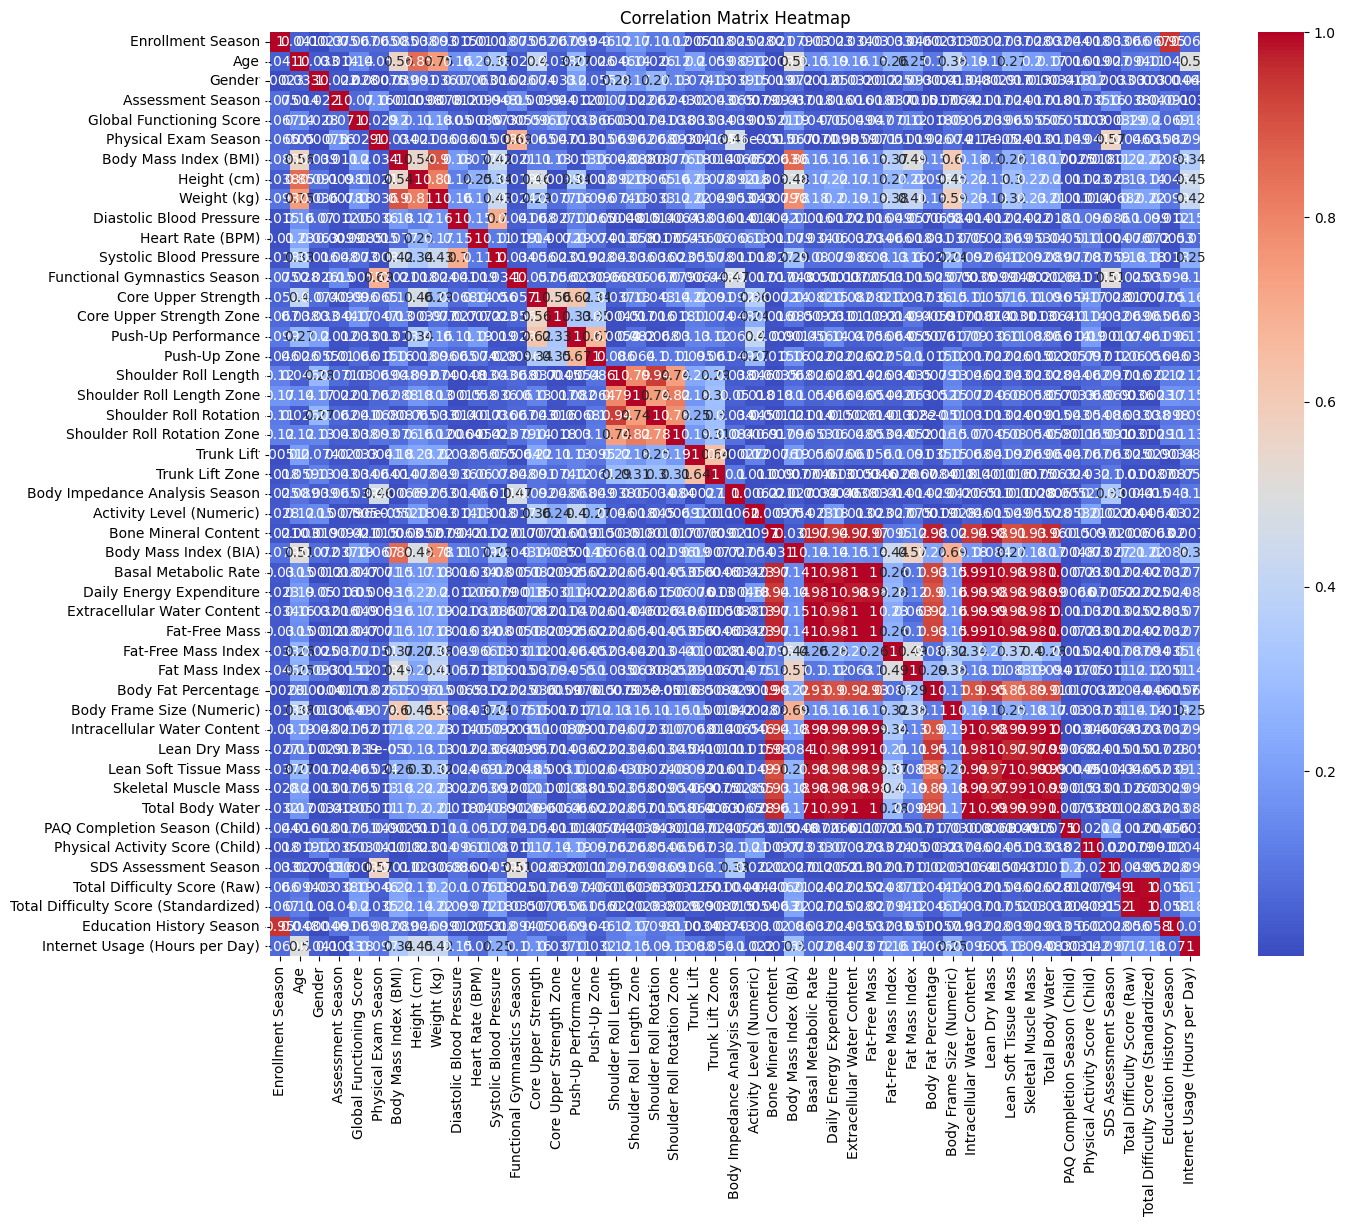

Number of Features Dropped: 15
Remaining Features: 33
Dropped Features: ['Weight (kg)', 'Shoulder Roll Rotation', 'Body Mass Index (BIA)', 'Basal Metabolic Rate', 'Daily Energy Expenditure', 'Extracellular Water Content', 'Fat-Free Mass', 'Body Fat Percentage', 'Intracellular Water Content', 'Lean Dry Mass', 'Lean Soft Tissue Mass', 'Skeletal Muscle Mass', 'Total Body Water', 'Total Difficulty Score (Standardized)', 'Education History Season']


In [71]:

# Calculate correlation matrix
correlation_matrix = BalancedData.drop('sii', axis=1).corr().abs()

# Visualize correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

correlation_threshold = 0.85

# Find features to drop
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Identify columns to drop (highly correlated features)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# Drop highly correlated features
ReducedData1 = BalancedData.drop(columns=to_drop)

# Print results
print(f"Number of Features Dropped: {len(to_drop)}")
print(f"Remaining Features: {ReducedData1.shape[1]}")
print("Dropped Features:", to_drop)



## 2.   Let's apply the Recursive Feature Elimination (RFE)
###  uses a machine learning model to iteratively select the most important features by recursively removing the least important ones.

### 1.  Using RandomForestClassifier

In [145]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = ReducedData1.drop('sii', axis=1)
y = ReducedData1['sii']

model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=15)

rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=15)

In [146]:
# Domain Knowledge
selected_features_randomForest = list(X.columns[rfe.support_])

selected_features_randomForest.append("Gender")

print("Selected Features by RFE:")
selected_features_randomForest

Selected Features by RFE:


['Age',
 'Assessment Season',
 'Global Functioning Score',
 'Body Mass Index (BMI)',
 'Height (cm)',
 'Diastolic Blood Pressure',
 'Heart Rate (BPM)',
 'Systolic Blood Pressure',
 'Core Upper Strength',
 'Body Impedance Analysis Season',
 'Fat-Free Mass Index',
 'Fat Mass Index',
 'Physical Activity Score (Child)',
 'Total Difficulty Score (Raw)',
 'Internet Usage (Hours per Day)',
 'Gender']

In [147]:
ReducedData_RFE_RandomForest = pd.concat([X[selected_features_randomForest], y], axis=1)

print(f"\nReduced Dataset Shape: {ReducedData_RFE_RandomForest.shape}")




Reduced Dataset Shape: (6376, 17)

Removed Features by RFE:


['Enrollment Season',
 'Physical Exam Season',
 'Functional Gymnastics Season',
 'Core Upper Strength Zone',
 'Push-Up Performance',
 'Push-Up Zone',
 'Shoulder Roll Length',
 'Shoulder Roll Length Zone',
 'Shoulder Roll Rotation Zone',
 'Trunk Lift',
 'Trunk Lift Zone',
 'Activity Level (Numeric)',
 'Bone Mineral Content',
 'Body Frame Size (Numeric)',
 'PAQ Completion Season (Child)',
 'SDS Assessment Season']

In [154]:
from sklearn.model_selection import train_test_split

X_rfe = ReducedData_RFE_RandomForest[selected_features_randomForest]
y_rfe = ReducedData_RFE_RandomForest['sii']

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y_rfe, test_size=0.2, random_state=42)


In [156]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

RandomForestModel = RandomForestClassifier(random_state=42)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(RandomForestModel, X_rfe, y_rfe, cv=kf, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.8369906  0.81411765 0.83843137 0.83215686 0.80705882]
Mean Accuracy: 0.8258
Standard Deviation: 0.0128


In [157]:
RandomForestModel.fit(X_train, y_train)
y_pred = RandomForestModel.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

# Output classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Set Accuracy: 0.8346
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.74      0.75       311
         1.0       0.75      0.72      0.74       318
         2.0       0.83      0.88      0.85       318
         3.0       0.96      1.00      0.98       329

    accuracy                           0.83      1276
   macro avg       0.83      0.83      0.83      1276
weighted avg       0.83      0.83      0.83      1276



### 2.  Applying Logistic Regression Algorithm Along with RFE

In [162]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X_rfe = ReducedData1.drop('sii', axis=1)
y_rfe = ReducedData1['sii']

LogisticModel = LogisticRegression(max_iter=500, random_state=42)

rfe = RFE(LogisticModel, n_features_to_select=15)

rfe.fit(X, y)

selected_features_LogisticRegression = X.columns[rfe.support_]
removed_features_LogisticRegression = X.columns[~rfe.support_]

print("Selected Features by RFE (Logistic Regression):")
selected_features_LogisticRegression = list(selected_features_LogisticRegression)
selected_features_LogisticRegression

Selected Features by RFE (Logistic Regression):


['Age',
 'Gender',
 'Height (cm)',
 'Heart Rate (BPM)',
 'Core Upper Strength Zone',
 'Push-Up Zone',
 'Shoulder Roll Length',
 'Shoulder Roll Length Zone',
 'Trunk Lift',
 'Activity Level (Numeric)',
 'Bone Mineral Content',
 'Fat Mass Index',
 'Physical Activity Score (Child)',
 'Total Difficulty Score (Raw)',
 'Internet Usage (Hours per Day)']

In [163]:

print("\nRemoved Features by RFE (Logistic Regression):")
removed_features_LogisticRegression = list(removed_features_LogisticRegression)
removed_features_LogisticRegression


Removed Features by RFE (Logistic Regression):


['Enrollment Season',
 'Assessment Season',
 'Global Functioning Score',
 'Physical Exam Season',
 'Body Mass Index (BMI)',
 'Diastolic Blood Pressure',
 'Systolic Blood Pressure',
 'Functional Gymnastics Season',
 'Core Upper Strength',
 'Push-Up Performance',
 'Shoulder Roll Rotation Zone',
 'Trunk Lift Zone',
 'Body Impedance Analysis Season',
 'Fat-Free Mass Index',
 'Body Frame Size (Numeric)',
 'PAQ Completion Season (Child)',
 'SDS Assessment Season']

In [164]:
ReducedData_RFE_Logistic = pd.concat([X[selected_features_LogisticRegression], y], axis=1)
print(f"\nReduced Dataset Shape (Logistic RFE): {ReducedData_RFE_Logistic.shape}")


Reduced Dataset Shape (Logistic RFE): (6376, 16)


In [165]:
from sklearn.linear_model import LogisticRegression

LogisticModel = LogisticRegression(max_iter=800, random_state=42)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(LogisticModel, X_rfe, y_rfe, cv=kf, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.57288401 0.56470588 0.56627451 0.58196078 0.55921569]
Mean Accuracy: 0.5690
Standard Deviation: 0.0078


In [166]:

X_train, X_test, y_train, y_test = train_test_split(X_rfe[selected_features_LogisticRegression], y_rfe, test_size=0.2, random_state=42)

LogisticModel.fit(X_train, y_train)
y_pred = LogisticModel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Set Accuracy: 0.5752
Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.67      0.62       311
         1.0       0.45      0.30      0.36       318
         2.0       0.50      0.46      0.48       318
         3.0       0.69      0.86      0.77       329

    accuracy                           0.58      1276
   macro avg       0.55      0.57      0.56      1276
weighted avg       0.56      0.58      0.56      1276



### 3.  Applying the XGBoost ALgorithm along with RFE

In [168]:
from xgboost import XGBClassifier

X_rfe = ReducedData1.drop('sii', axis=1)
y_rfe = ReducedData1['sii']

XGBoostModel = XGBClassifier(random_state=42, eval_metric='mlogloss')

rfe = RFE(XGBoostModel, n_features_to_select=15)
rfe.fit(X_rfe, y_rfe)

selected_features_XGBoost = X_rfe.columns[rfe.support_]
removed_features_XGBoost = X_rfe.columns[~rfe.support_]

print("Selected Features by RFE (XGBoost):")
selected_features_XGBoost = list(selected_features_XGBoost)
selected_features_XGBoost


Selected Features by RFE (XGBoost):


['Age',
 'Gender',
 'Assessment Season',
 'Physical Exam Season',
 'Body Mass Index (BMI)',
 'Height (cm)',
 'Core Upper Strength',
 'Core Upper Strength Zone',
 'Push-Up Zone',
 'Shoulder Roll Length Zone',
 'Body Impedance Analysis Season',
 'Body Frame Size (Numeric)',
 'SDS Assessment Season',
 'Total Difficulty Score (Raw)',
 'Internet Usage (Hours per Day)']

In [169]:
print("\nRemoved Features by RFE (XGBoost):")
removed_features_XGBoost = list(removed_features_XGBoost)
removed_features_XGBoost



Removed Features by RFE (XGBoost):


['Enrollment Season',
 'Global Functioning Score',
 'Diastolic Blood Pressure',
 'Heart Rate (BPM)',
 'Systolic Blood Pressure',
 'Functional Gymnastics Season',
 'Push-Up Performance',
 'Shoulder Roll Length',
 'Shoulder Roll Rotation Zone',
 'Trunk Lift',
 'Trunk Lift Zone',
 'Activity Level (Numeric)',
 'Bone Mineral Content',
 'Fat-Free Mass Index',
 'Fat Mass Index',
 'PAQ Completion Season (Child)',
 'Physical Activity Score (Child)']

In [170]:
ReducedData_RFE_XGBoost = pd.concat([X_rfe[selected_features_XGBoost], y_rfe], axis=1)
print(f"\nReduced Dataset Shape (XGBoost RFE): {ReducedData_RFE_XGBoost.shape}")


Reduced Dataset Shape (XGBoost RFE): (6376, 16)


In [171]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_xgb = cross_val_score(XGBoostModel, X_rfe[selected_features_XGBoost], y_rfe, cv=kf, scoring='accuracy')
print(f"XGBoost Cross-Validation Accuracy Scores: {cv_scores_xgb}")
print(f"Mean Accuracy: {cv_scores_xgb.mean():.4f}")
print(f"Standard Deviation: {cv_scores_xgb.std():.4f}")


XGBoost Cross-Validation Accuracy Scores: [0.80956113 0.79921569 0.82509804 0.82196078 0.80470588]
Mean Accuracy: 0.8121
Standard Deviation: 0.0099


In [132]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rfe[selected_features_XGBoost], y_rfe, test_size=0.2, random_state=42)

# Train and evaluate on test set
XGBoostModel.fit(X_train, y_train)
y_pred = XGBoostModel.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Set Accuracy: 0.8237
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       311
         1.0       0.72      0.68      0.70       318
         2.0       0.85      0.83      0.84       318
         3.0       0.97      1.00      0.98       329

    accuracy                           0.82      1276
   macro avg       0.82      0.82      0.82      1276
weighted avg       0.82      0.82      0.82      1276



### 4.  Applying Decision Tree Algorithm along with RFE

In [172]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

X_rfe = ReducedData1.drop('sii', axis=1)
y_rfe = ReducedData1['sii']

DecisionTreeModel = DecisionTreeClassifier(random_state=42)

rfe = RFE(DecisionTreeModel, n_features_to_select=15)
rfe.fit(X_rfe, y_rfe)

selected_features_DecisionTree = X_rfe.columns[rfe.support_]
removed_features_DecisionTree = X_rfe.columns[~rfe.support_]

print("Selected Features by RFE (Decision Tree):")
selected_features_DecisionTree = list(selected_features_DecisionTree)
selected_features_DecisionTree


Selected Features by RFE (Decision Tree):


['Age',
 'Assessment Season',
 'Global Functioning Score',
 'Body Mass Index (BMI)',
 'Height (cm)',
 'Diastolic Blood Pressure',
 'Heart Rate (BPM)',
 'Systolic Blood Pressure',
 'Core Upper Strength',
 'Shoulder Roll Length',
 'Trunk Lift',
 'Fat-Free Mass Index',
 'Physical Activity Score (Child)',
 'Total Difficulty Score (Raw)',
 'Internet Usage (Hours per Day)']

In [173]:
print("\nRemoved Features by RFE (Decision Tree):")
removed_features_DecisionTree = list(removed_features_DecisionTree)
removed_features_DecisionTree



Removed Features by RFE (Decision Tree):


['Enrollment Season',
 'Gender',
 'Physical Exam Season',
 'Functional Gymnastics Season',
 'Core Upper Strength Zone',
 'Push-Up Performance',
 'Push-Up Zone',
 'Shoulder Roll Length Zone',
 'Shoulder Roll Rotation Zone',
 'Trunk Lift Zone',
 'Body Impedance Analysis Season',
 'Activity Level (Numeric)',
 'Bone Mineral Content',
 'Fat Mass Index',
 'Body Frame Size (Numeric)',
 'PAQ Completion Season (Child)',
 'SDS Assessment Season']

In [174]:
ReducedData_RFE_DecisionTree = pd.concat([X_rfe[selected_features_DecisionTree], y_rfe], axis=1)
print(f"\nReduced Dataset Shape (Decision Tree RFE): {ReducedData_RFE_DecisionTree.shape}")


Reduced Dataset Shape (Decision Tree RFE): (6376, 16)


In [175]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_dt = cross_val_score(DecisionTreeModel, X_rfe[selected_features_DecisionTree], y_rfe, cv=kf, scoring='accuracy')
print(f"Decision Tree Cross-Validation Accuracy Scores: {cv_scores_dt}")
print(f"Mean Accuracy: {cv_scores_dt.mean():.4f}")
print(f"Standard Deviation: {cv_scores_dt.std():.4f}")


Decision Tree Cross-Validation Accuracy Scores: [0.71316614 0.70980392 0.69882353 0.70901961 0.71058824]
Mean Accuracy: 0.7083
Standard Deviation: 0.0049


In [176]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rfe[selected_features_DecisionTree], y_rfe, test_size=0.2, random_state=42)

DecisionTreeModel.fit(X_train, y_train)
y_pred = DecisionTreeModel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Set Accuracy: 0.7296
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.62      0.64       311
         1.0       0.60      0.60      0.60       318
         2.0       0.72      0.72      0.72       318
         3.0       0.92      0.97      0.94       329

    accuracy                           0.73      1276
   macro avg       0.72      0.73      0.73      1276
weighted avg       0.73      0.73      0.73      1276



### 5.  Applying the Naive Bayes Algorithm and finding 

In [177]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest
k_best = SelectKBest(score_func=f_classif, k=15)
X_new = k_best.fit_transform(X_rfe, y_rfe)

# Get selected feature names
selected_features_NaiveBayes = X_rfe.columns[k_best.get_support()]

print("Selected Features by SelectKBest (Naive Bayes):")
selected_features_NaiveBayes = list(selected_features_NaiveBayes.tolist())
selected_features_NaiveBayes

Selected Features by SelectKBest (Naive Bayes):


['Age',
 'Global Functioning Score',
 'Body Mass Index (BMI)',
 'Height (cm)',
 'Heart Rate (BPM)',
 'Systolic Blood Pressure',
 'Core Upper Strength',
 'Push-Up Performance',
 'Shoulder Roll Length Zone',
 'Activity Level (Numeric)',
 'Fat-Free Mass Index',
 'Fat Mass Index',
 'Body Frame Size (Numeric)',
 'Total Difficulty Score (Raw)',
 'Internet Usage (Hours per Day)']

In [178]:
# Create reduced dataset
ReducedData_SelectKBest = pd.concat([X_rfe[selected_features_NaiveBayes], y_rfe], axis=1)
print(f"\nReduced Dataset Shape (SelectKBest): {ReducedData_SelectKBest.shape}")



Reduced Dataset Shape (SelectKBest): (6376, 16)


In [179]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes model
NaiveBayesModel = GaussianNB()

# Define K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores_nb = cross_val_score(NaiveBayesModel, X_rfe[selected_features_NaiveBayes], y_rfe, cv=kf, scoring='accuracy')

# Print cross-validation results
print(f"Naive Bayes Cross-Validation Accuracy Scores: {cv_scores_nb}")
print(f"Mean Accuracy: {cv_scores_nb.mean():.4f}")
print(f"Standard Deviation: {cv_scores_nb.std():.4f}")


Naive Bayes Cross-Validation Accuracy Scores: [0.47962382 0.47137255 0.47607843 0.48862745 0.4572549 ]
Mean Accuracy: 0.4746
Standard Deviation: 0.0103


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_rfe[selected_features_NaiveBayes], y_rfe, test_size=0.2, random_state=42
)

# Train the Naive Bayes model
NaiveBayesModel.fit(X_train, y_train)
y_pred = NaiveBayesModel.predict(X_test)

# Evaluate performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy (Naive Bayes): {accuracy:.4f}")
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred))


Test Set Accuracy (Naive Bayes): 0.4734
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

         0.0       0.62      0.52      0.57       311
         1.0       0.31      0.58      0.40       318
         2.0       0.62      0.03      0.06       318
         3.0       0.62      0.75      0.68       329

    accuracy                           0.47      1276
   macro avg       0.54      0.47      0.43      1276
weighted avg       0.54      0.47      0.43      1276



## Results based on Comparsions

## Model Comparison Summary:

| Model                | CV Accuracy | Test Accuracy | Macro F1-Score | Strengths                                      | Weaknesses                                 |
|----------------------|--------------|----------------|----------------|-----------------------------------------------|-------------------------------------------|
| **Random Forest**    | **0.8258**   | **0.8346**     | **0.83**       | High accuracy, balanced performance across all classes | Slightly lower precision on Class 1      |
| **Logistic Regression** | 0.5690    | 0.5752         | 0.56           | Simplicity, interpretability                  | Poor accuracy and recall for Class 1 & 2 |
| **XGBoost**          | 0.8121       | 0.8237         | 0.82           | Strong performance, best for Class 3          | Slightly lower recall on Class 1          |
| **Decision Tree**    | 0.7083       | 0.7296         | 0.73           | Interpretability, good for Class 3            | Overfitting risk, lower precision for Class 1 |
| **Naive Bayes**      | 0.4746       | 0.4734         | 0.43           | Fast, interpretable                           | Assumes feature independence, poor recall for Class 2 |

### Conclusion:
Random Forest performed the best, with the highest test accuracy (83.46%) and balanced F1-score (0.83), showcasing consistent performance across all classes. XGBoost was a close second with 82.37% accuracy, offering strong precision and recall but slightly lower recall for certain classes. In comparison, Logistic Regression, Naive Bayes, and Decision Tree underperformed, making Random Forest the most reliable choice.


## Final Proposed Model for Training:  RandomForest

### Fine-Tuning the RandomForest model parameters

In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

RandomForestModelFineTuned = RandomForestClassifier(random_state=42)

In [182]:
# Train-test split
X_RF = ReducedData_RFE_RandomForest.drop('sii', axis=1)
Y_RF = ReducedData_RFE_RandomForest['sii']

X_train, X_test, y_train, y_test = train_test_split(X_RF, Y_RF, test_size=0.2, random_state=42)

grid_search = GridSearchCV(estimator=RandomForestModelFineTuned, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8131372549019608


In [183]:
# Training the final Random Forest model with the best parameters

best_RandomForest_model = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_RandomForest_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [184]:
# Predict on the test set
y_pred = best_RandomForest_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Set Accuracy: 0.8339
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       311
         1.0       0.75      0.71      0.73       318
         2.0       0.84      0.87      0.85       318
         3.0       0.96      1.00      0.98       329

    accuracy                           0.83      1276
   macro avg       0.83      0.83      0.83      1276
weighted avg       0.83      0.83      0.83      1276



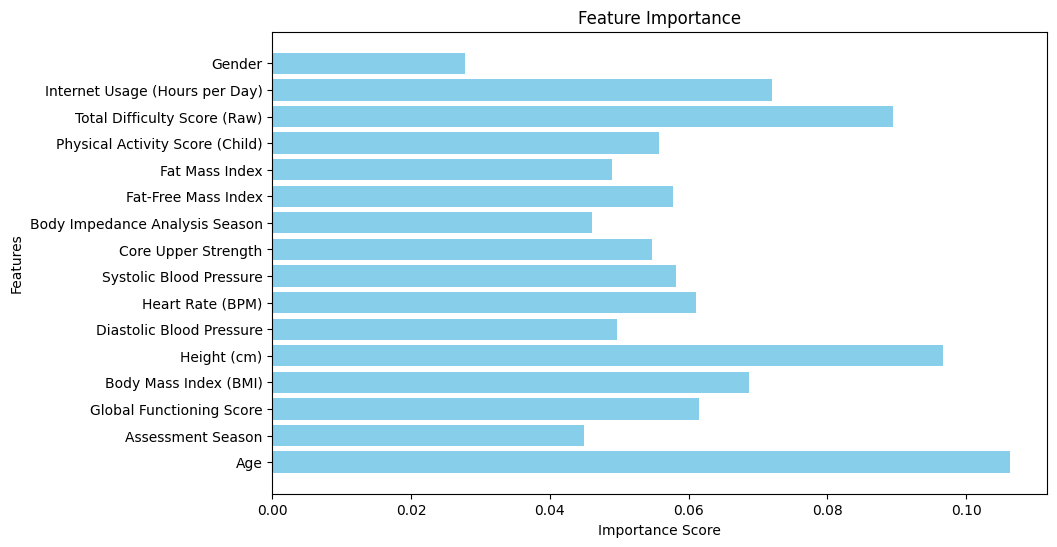

In [186]:
# Feature importance
import matplotlib.pyplot as plt

importances = best_RandomForest_model.feature_importances_
feature_names = X_RF.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# Final Remarks
#### the fine-tuned model has similar performance and can also be deployed confidently, as it provides similar metrics with the added benefit of optimized hyperparameters. 

## Storing the Model for it's use in Deployment later on

In [187]:
import pickle

with open('RandomForest_model.pkl', 'wb') as file:
    pickle.dump(best_RandomForest_model, file)

print("Model saved successfully!")

Model saved successfully!


### Storing the Reduced data used in RandomForest model Training

In [188]:
import pickle

with open('Data_For_RandomForest_model_Training.pkl', 'wb') as file:
    pickle.dump(ReducedData_RFE_RandomForest, file)

print("ReducedData_RFE_RandomForest saved successfully!")


ReducedData_RFE_RandomForest saved successfully!


### Saving the Cleanned and Normalized dataset information

In [189]:
import pickle

with open('CleannedData_With_all_info.pkl', 'wb') as file:
    pickle.dump(BalancedData, file)

print("BalancedData saved successfully!")


BalancedData saved successfully!


## Saving the scaler so that same scaler must be applied to the live user input while model is deployed

In [222]:
scaler_for_live_data = StandardScaler()

X_reduced = ReducedData_RFE_RandomForest.drop('sii', axis=1)

scaler_for_live_data.fit(X_reduced)


import pickle

with open('Scaler_For_Live_Data.pkl', 'wb') as file:
    pickle.dump(scaler_for_live_data, file)

print("Scaler_For_Live_Data saved successfully!")


Scaler_For_Live_Data saved successfully!


#### Saving the scaler ensures that your live data is scaled consistently with the training data, avoiding discrepancies between training and prediction phases.

In [ ]:
import pickle

with open('CleannedData_With_all_info.pkl', 'wb') as file:
    pickle.dump(BalancedData, file)

print(" saved successfully!")


## Let's test the model on an unseen data point

In [259]:
# Define random sample data based on the column structure and typical data ranges
random_sample = pd.DataFrame({
    'Age': [np.random.randint(10, 18)],
    'Assessment Season': [np.random.choice([1, 2, 3, 4])],  # Encoded seasons: Fall: 1, Spring: 2, Summer: 3, Winter: 4
    'Global Functioning Score': [np.random.uniform(40, 100)],  # Example range for functioning scores
    'Body Mass Index (BMI)': [np.random.uniform(15, 30)],  # Example BMI range
    'Height (cm)': [np.random.uniform(140, 180)],  # Height in cm
    'Diastolic Blood Pressure': [np.random.uniform(60, 90)],  # Blood pressure range
    'Heart Rate (BPM)': [np.random.uniform(60, 100)],  # Heart rate in BPM
    'Systolic Blood Pressure': [np.random.uniform(90, 140)],  # Blood pressure range
    'Core Upper Strength': [np.random.uniform(5, 20)],  # Example strength range
    'Body Impedance Analysis Season': [np.random.choice([1, 2, 3, 4])],  # Encoded seasons
    'Fat-Free Mass Index': [np.random.uniform(15, 25)],  # Example fat-free mass index
    'Fat Mass Index': [np.random.uniform(3, 10)],  # Example fat mass index
    'Physical Activity Score (Child)': [np.random.uniform(10, 50)],  # Example PAQ-C scores
    'Total Difficulty Score (Raw)': [np.random.uniform(0, 40)],  # Example difficulty score
    'Internet Usage (Hours per Day)': [np.random.uniform(0, 5)],  # Example internet usage in hours
    'Gender': [np.random.choice([0, 1])]  # Gender encoded as 0 (Male), 1 (Female)
})



input_data = random_sample[X_reduced.columns]  # Align the columns as model was trained because order matters

scaled_input = scaler_for_live_data.transform(input_data)

predicted_class = best_RandomForest_model.predict(scaled_input)

# Output the prediction
print(f"Predicted Class for the Random Sample: {predicted_class[0]}")


Predicted Class for the Random Sample: 2.0


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Loading the stored Serialized Object
